# Maps of SF Street Trees and Equity Priority Communities
## By: Caleb Huang

In [2]:
# import pandas
import pandas as pd 
import geopandas as gpd
import plotly.express as px
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [3]:
# creating the dataframe 
df = pd.read_csv('Data/Street_Tree_List.csv')

## Data Exploration

In [4]:
# looking at the amount of rows and columns
df.shape

(198393, 24)

In [5]:
# looking at the top 5 rows
df.head()

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,PlantType,qCaretaker,qCareAssistant,PlantDate,...,YCoord,Latitude,Longitude,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old),Analysis Neighborhoods
0,225873,DPW Maintained,Koelreuteria bipinnata :: Chinese Flame Tree,822 Alabama St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,...,2.104279e+06,37.758462,-122.411593,"(37.75846190721876, -122.41159276561366)",2.0,4.0,7.0,28859.0,19.0,20.0
1,133842,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,...,2.115022e+06,37.787404,-122.446379,"(37.787403655494266, -122.44637901807063)",13.0,6.0,1.0,29490.0,31.0,31.0
2,3119,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,3.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,...,2.115015e+06,37.787381,-122.446532,"(37.787380880159084, -122.44653244062533)",13.0,6.0,1.0,29490.0,31.0,31.0
3,3120,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,4.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,...,2.115012e+06,37.787374,-122.446592,"(37.787373511112456, -122.4465917751871)",13.0,6.0,1.0,29490.0,31.0,31.0
4,272733,DPW Maintained,Fraxinus uhdei :: Shamel Ash: Evergreen Ash,590 Masonic Ave,4.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,...,2.110904e+06,37.776091,-122.446402,"(37.77609111946836, -122.44640232649878)",15.0,5.0,11.0,29492.0,16.0,18.0


In [6]:
# Loading all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
# looking at all the columns
df.head()

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,PlantType,qCaretaker,qCareAssistant,PlantDate,DBH,PlotSize,PermitNotes,XCoord,YCoord,Latitude,Longitude,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old),Analysis Neighborhoods
0,225873,DPW Maintained,Koelreuteria bipinnata :: Chinese Flame Tree,822 Alabama St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,12.0,Width 3ft,NaN,6.009091e+06,2.104279e+06,37.758462,-122.411593,"(37.75846190721876, -122.41159276561366)",2.0,4.0,7.0,28859.0,19.0,20.0
1,133842,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,1.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,8.0,Width 4ft,NaN,5.999256e+06,2.115022e+06,37.787404,-122.446379,"(37.787403655494266, -122.44637901807063)",13.0,6.0,1.0,29490.0,31.0,31.0
2,3119,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,3.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,12.0,3X3,NaN,5.999211e+06,2.115015e+06,37.787381,-122.446532,"(37.787380880159084, -122.44653244062533)",13.0,6.0,1.0,29490.0,31.0,31.0
3,3120,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,3170 California St,4.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,6.0,3X3,NaN,5.999194e+06,2.115012e+06,37.787374,-122.446592,"(37.787373511112456, -122.4465917751871)",13.0,6.0,1.0,29490.0,31.0,31.0
4,272733,DPW Maintained,Fraxinus uhdei :: Shamel Ash: Evergreen Ash,590 Masonic Ave,4.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,NaN,NaN,Width 0ft,NaN,5.999164e+06,2.110904e+06,37.776091,-122.446402,"(37.77609111946836, -122.44640232649878)",15.0,5.0,11.0,29492.0,16.0,18.0


In [8]:
# See details for the dataframe
df.info (verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198393 entries, 0 to 198392
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   TreeID                     198393 non-null  int64  
 1   qLegalStatus               198336 non-null  object 
 2   qSpecies                   198393 non-null  object 
 3   qAddress                   196901 non-null  object 
 4   SiteOrder                  196561 non-null  float64
 5   qSiteInfo                  198393 non-null  object 
 6   PlantType                  198393 non-null  object 
 7   qCaretaker                 198393 non-null  object 
 8   qCareAssistant             25449 non-null   object 
 9   PlantDate                  72044 non-null   object 
 10  DBH                        153804 non-null  float64
 11  PlotSize                   147832 non-null  object 
 12  PermitNotes                54298 non-null   object 
 13  XCoord                     19

## Data Cleaning

In [9]:
# sorting out the columns I need
tree_columns = ['TreeID',
                'Latitude',
                'Longitude',
               'Location']
# creating a new dataframe with new columns
df2 = df[tree_columns]

In [10]:
# Checking my work
df2.sample(1)

,TreeID,Latitude,Longitude,Location
122191,191672,37.771211,-122.41593,"(37.77121116957815, -122.41593032173733)"


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198393 entries, 0 to 198392
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   TreeID     198393 non-null  int64  
 1   Latitude   195321 non-null  float64
 2   Longitude  195321 non-null  float64
 3   Location   195321 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 6.1+ MB


In [12]:
# renaming the columns
df2.columns = ['Tree ID',
'Latitude',
'Longitude',
'Location']

In [13]:
df2.head()

,Tree ID,Latitude,Longitude,Location
0,225873,37.758462,-122.411593,"(37.75846190721876, -122.41159276561366)"
1,133842,37.787404,-122.446379,"(37.787403655494266, -122.44637901807063)"
2,3119,37.787381,-122.446532,"(37.787380880159084, -122.44653244062533)"
3,3120,37.787374,-122.446592,"(37.787373511112456, -122.4465917751871)"
4,272733,37.776091,-122.446402,"(37.77609111946836, -122.44640232649878)"


In [14]:
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

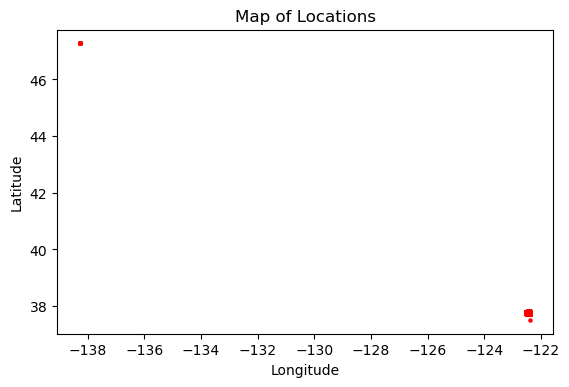

In [15]:
# Plot the GeoDataFrame
gdf.plot(marker='o', color='red', markersize=5)
plt.title('Map of Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Data Visualization

In [16]:
# Importing San Francisco's EPC's shapefile to start creating maps
sf_epcs=gpd.read_file("Data/SF EPCs/SF_EPCs_2021.shp")
sf_epcs.head()

,geoid,state_fip,county_fip,tract,block_grou,tot_pop,pop_minori,pct_minori,tot_pop_se,pop_over75,pct_over75,tot_fam,pop_spfam,pct_spfam,tot_pop_ov,pop_lep,pct_lep,tot_pop_po,pop_below2,pct_below2,tot_pop_ci,pop_disabi,pct_disab,tot_hh,pop_zvhhs,pct_zvhhs,pop_hus_re,pct_hus_re,geometry
0,06075010700,06,075,010700,NA,5522,4792,0.867802,5522,871,0.157733,1378,121,0.087808,5370.0,3078.0,0.573184,5522,3170,0.574067,5522.0,788.0,0.142702,2491.0,1829.0,0.734243,527,0.211562,"POLYGON ((-122.41291 37.80218, -122.41138 37.8..."
1,06075012401,06,075,012401,NA,4782,3424,0.716018,4782,166,0.034714,725,110,0.151724,4521.0,785.0,0.173634,4782,2284,0.477624,4782.0,1021.0,0.213509,2749.0,2138.0,0.777737,878,0.319389,"POLYGON ((-122.41771 37.78424, -122.41607 37.7..."
2,06075010600,06,075,010600,NA,3356,2107,0.627831,3356,425,0.126639,673,34,0.050520,3335.0,1012.0,0.303448,3356,1388,0.413588,3343.0,488.0,0.145977,1797.0,1248.0,0.694491,264,0.146912,"POLYGON ((-122.41102 37.80117, -122.40777 37.8..."
3,06075011300,06,075,011300,NA,3046,2585,0.848654,3046,737,0.241957,675,83,0.122963,2927.0,1429.0,0.488213,3010,1434,0.476412,3046.0,745.0,0.244583,1546.0,1188.0,0.768435,332,0.214748,"POLYGON ((-122.41172 37.79629, -122.40843 37.7..."
4,06075011800,06,075,011800,NA,1477,1338,0.905890,1477,250,0.169262,370,37,0.100000,1426.0,710.0,0.497896,1477,780,0.528097,1477.0,204.0,0.138118,735.0,605.0,0.823129,173,0.235374,"POLYGON ((-122.4079 37.79406, -122.4048 37.794..."


<Axes: >

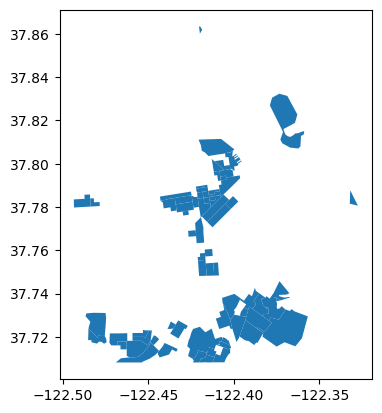

In [17]:
# plotting the shape file to get a better understanding of the file
sf_epcs.plot()

In [18]:
# creating a new geodata frame using the Longitude and Latitude from dataframe, df2
gdf = gpd.GeoDataFrame(
    df2, geometry=gpd.points_from_xy(df2.Longitude, df2.Latitude),crs=4326)

In [19]:
# creating a spatial join
trees_per_tract = gpd.sjoin(sf_epcs, gdf)
trees_per_tract.sample()

,geoid,state_fip,county_fip,tract,block_grou,tot_pop,pop_minori,pct_minori,tot_pop_se,pop_over75,pct_over75,tot_fam,pop_spfam,pct_spfam,tot_pop_ov,pop_lep,pct_lep,tot_pop_po,pop_below2,pct_below2,tot_pop_ci,pop_disabi,pct_disab,tot_hh,pop_zvhhs,pct_zvhhs,pop_hus_re,pct_hus_re,geometry,index_right,Tree ID,Latitude,Longitude,Location
38,06075017802,06,075,017802,NA,5782,3863,0.668108,5782,142,0.024559,936,130,0.138889,5582.0,590.0,0.105697,5771,2746,0.475827,5756.0,952.0,0.165393,2535.0,1512.0,0.59645,507,0.2,"POLYGON ((-122.41316 37.77499, -122.41161 37.7...",196204,199504,37.779556,-122.407224,"(37.77955586016441, -122.40722366934241)"


In [20]:
# creating a count per EPC tract
tree_counts = trees_per_tract.value_counts('tract').reset_index(name='tree count')
tree_counts

,tract,tree count
0,023102,2137
1,010100,1802
2,017802,1575
3,020100,1573
4,017601,1509
5,016100,1507
6,015801,1506
7,061200,1331
8,023200,1263
9,015500,1248


In [21]:
# creating a data frame with trees organized from least to most
df_least_trees=tree_counts.sort_values(by='tree count',ascending = True)
df_least_trees

,tract,tree count
64,017902,8
63,033201,98
62,011800,105
61,026100,112
60,012502,112
59,026401,115
58,012301,121
57,012302,130
56,011300,157
55,042601,176


<Axes: title={'center': 'Census Tracts with the Least Number of Trees'}, ylabel='tract'>

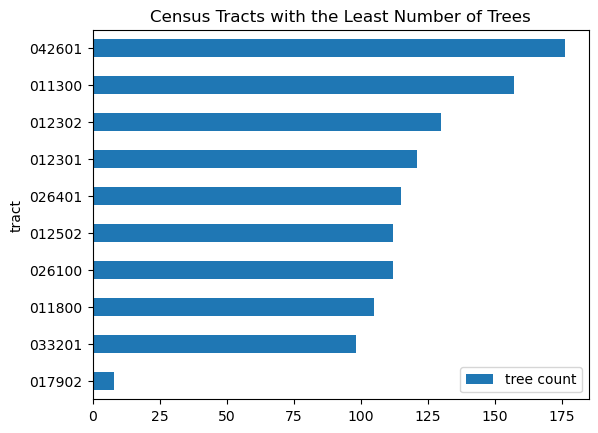

In [22]:
# creating a bar chart showing the tracts with the least amount of trees
df_least_trees.head(10).plot.barh(x='tract',
                                  y='tree count',
                                  title='Census Tracts with the Least Number of Trees')

In [23]:
ten_least_trees=df_least_trees.head(10)
ten_least_trees

,tract,tree count
64,017902,8
63,033201,98
62,011800,105
61,026100,112
60,012502,112
59,026401,115
58,012301,121
57,012302,130
56,011300,157
55,042601,176


In [24]:
# merging trees to EPC neighborhood
neighborhoodtrees = sf_epcs.merge(tree_counts, how='left',on='tract')

In [25]:
# checking my work
neighborhoodtrees.sample()

,geoid,state_fip,county_fip,tract,block_grou,tot_pop,pop_minori,pct_minori,tot_pop_se,pop_over75,pct_over75,tot_fam,pop_spfam,pct_spfam,tot_pop_ov,pop_lep,pct_lep,tot_pop_po,pop_below2,pct_below2,tot_pop_ci,pop_disabi,pct_disab,tot_hh,pop_zvhhs,pct_zvhhs,pop_hus_re,pct_hus_re,geometry,tree count
58,060750264011,06,075,026401,1,1886,1859,0.985684,1886,213,0.112937,402,101,0.251244,0.0,0.0,0.277694,1873,581,0.310198,0.0,0.0,0.082582,0.0,0.0,0.164506,0,0.078764,"POLYGON ((-122.41621 37.71453, -122.41616 37.7...",115


In [26]:
# reading the datafile I need
sf_census=gpd.read_file("Data/SF Census Tracts.geojson")

<Axes: >

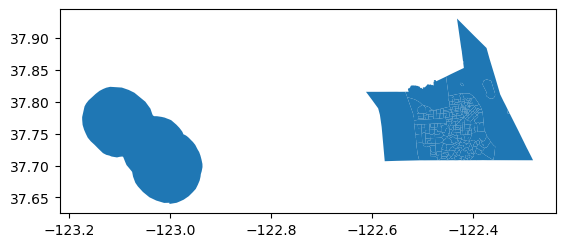

In [27]:
# plotting the census tracts
sf_census.plot()

In [28]:
# deleting all census tracts with no people
sf_census.drop([35,88,205],axis=0,inplace=True)

<Axes: >

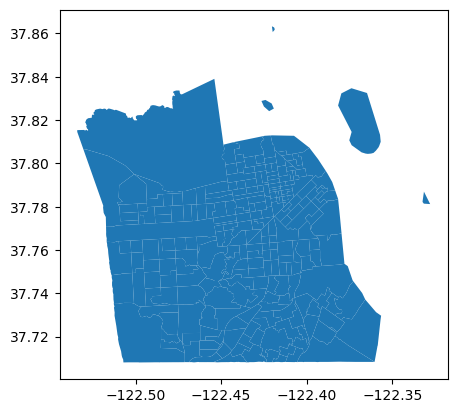

In [29]:
# plotting again to check my work
sf_census.plot()

In [30]:
# creating a new variable where my geodata frame and census tracts are joined
trees_per_census_tract = gpd.sjoin(sf_census, gdf)

In [31]:
# creating a count of trees per census tract
tree_counts1 = trees_per_census_tract.value_counts('tractce').reset_index(name='tree count')
tree_counts1.head()

,tractce,tree count
0,030900,3724
1,980900,3303
2,030800,2803
3,031100,2645
4,025200,2503


In [32]:
# creating a merge where I am merging census tracts to their tree counts
neighborhoodtrees1 = sf_census.merge(tree_counts1, how='left',on='tractce')

In [33]:
# checking my work
neighborhoodtrees1.sample()

,name,intptlon,awater,mtfcc,aland,namelsad,tractce,statefp,data_loaded_at,intptlat,funcstat,countyfp,data_as_of,geoid,geometry,tree count
175,154.02,-122.4514018,0.0,G5020,327153.0,Census Tract 154.02,015402,06,2022-03-04,+37.7855854,S,075,2021-02-01,06075015402,"MULTIPOLYGON (((-122.45918 37.78568, -122.4580...",687


Text(0.5, 1.0, 'Street Trees by Census Tract in SF')

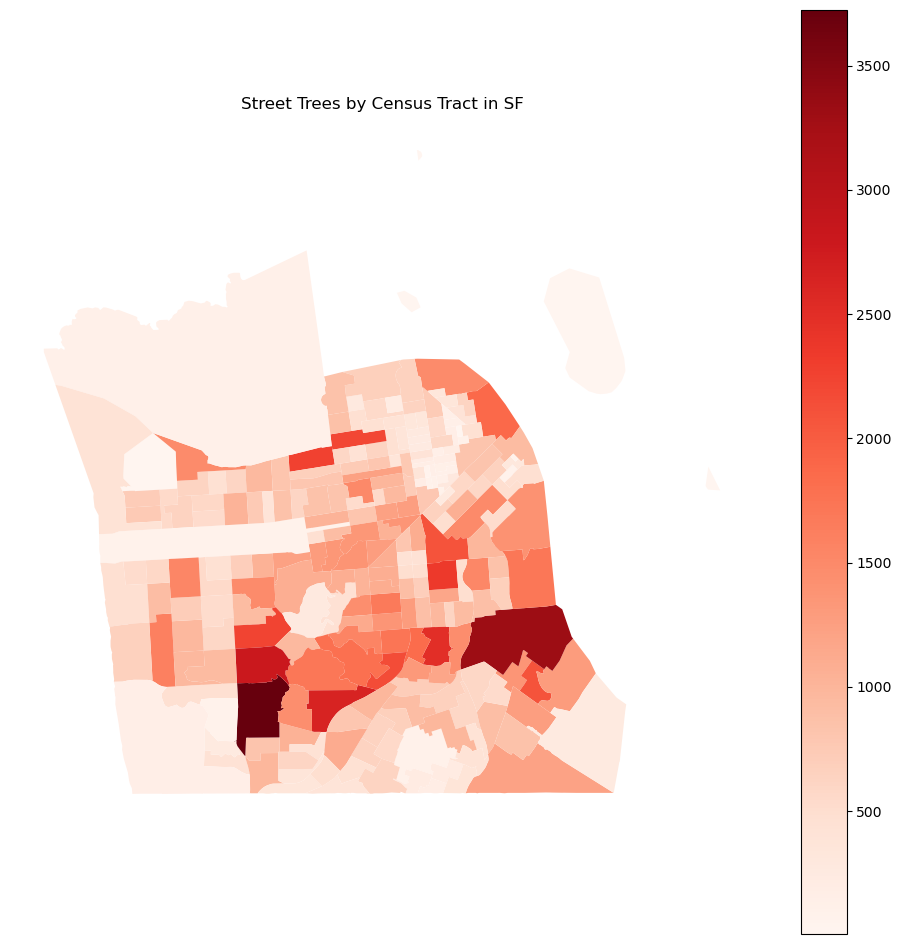

In [34]:
# plot trees per Equity Priority Community
fig,ax = plt.subplots(figsize=(12,12))

neighborhoodtrees1.plot(ax=ax,column='tree count',legend=True,cmap='Reds')

ax.axis('off')

# add title
ax.set_title('Street Trees by Census Tract in SF')

In [35]:
from shapely.geometry import Polygon

<Axes: >

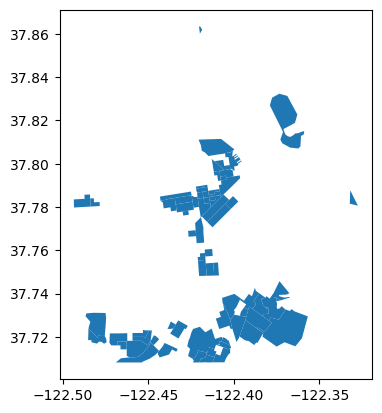

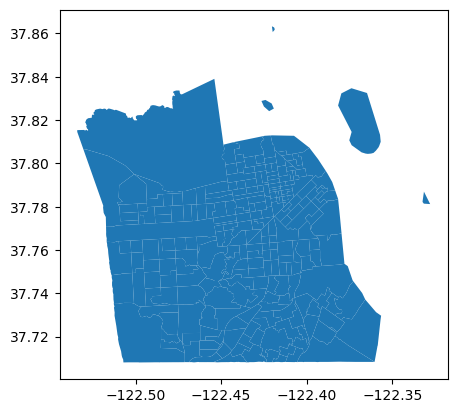

In [36]:
# plotting both the Equity Priority Communities and Census tracts map
sf_epcs.plot()
neighborhoodtrees1.plot()

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:2675: UserWarning: `keep_geom_type=True` in overlay resulted in 33 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


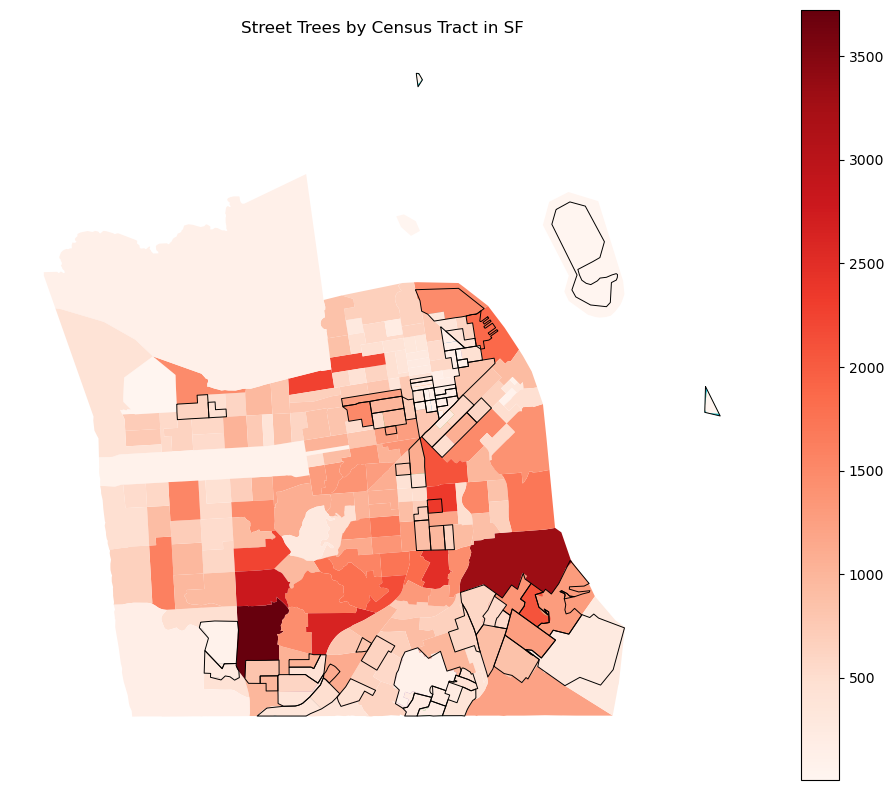

In [37]:
# overlaying the Equity Priority Communities Map over the Street Trees Map
res_identity=sf_epcs.overlay(neighborhoodtrees1, how='identity')

ax = res_identity.plot(figsize=(12,10),
                       cmap='tab10')

neighborhoodtrees1.plot(ax=ax,column='tree count',legend=True,cmap='Reds');

sf_epcs.plot(figsize=(12,10),
             ax=ax, facecolor='none', edgecolor='k', linewidth=.7);

# add title
ax.set_title('Street Trees by Census Tract in SF')
ax.axis('off')
plt.savefig('Street Trees.png')

## **Time to run a for-loop**

I want to create a for-loop showing plotting trees in the five tracts with the least amount of trees. 

In [38]:
gdf_2 = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude),crs=4326)

<Axes: >

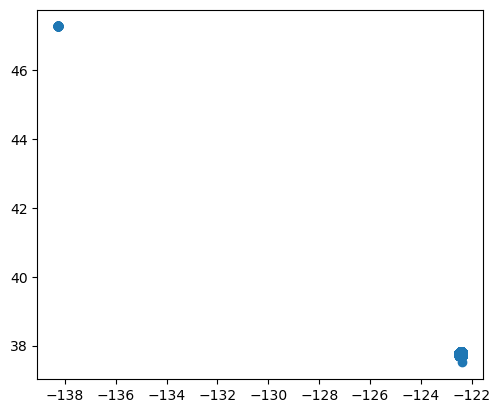

In [39]:
gdf_2.plot()

In [40]:
trees_mapped = gpd.sjoin(gdf, sf_epcs)
trees_mapped.sample(5)

,Tree ID,Latitude,Longitude,Location,geometry,index_right,geoid,state_fip,county_fip,tract,block_grou,tot_pop,pop_minori,pct_minori,tot_pop_se,pop_over75,pct_over75,tot_fam,pop_spfam,pct_spfam,tot_pop_ov,pop_lep,pct_lep,tot_pop_po,pop_below2,pct_below2,tot_pop_ci,pop_disabi,pct_disab,tot_hh,pop_zvhhs,pct_zvhhs,pop_hus_re,pct_hus_re
54417,80866,37.725936,-122.431610,"(37.72593564469109, -122.43160998465974)",POINT (-122.43161 37.72594),26,06075026001,06,075,026001,NA,6018,5383,0.894483,6018,250,0.041542,1273,278,0.218382,5756.0,1109.0,0.192669,6018,1985,0.329844,6018.0,485.0,0.080592,1591.0,179.0,0.112508,263,0.165305
87717,106986,37.785388,-122.430547,"(37.785388187339855, -122.43054746615644)",POINT (-122.43055 37.78539),10,06075015500,06,075,015500,NA,3532,1879,0.531993,3532,967,0.273783,538,37,0.068773,3471.0,725.0,0.208874,3487,1055,0.302552,3487.0,1039.0,0.297964,2324.0,1375.0,0.591652,550,0.236661
115003,108322,37.712643,-122.403008,"(37.7126428486885, -122.40300842737231)",POINT (-122.40301 37.71264),17,06075026403,06,075,026403,NA,3962,3692,0.931853,3962,335,0.084553,811,130,0.160296,3800.0,1034.0,0.272105,3892,1113,0.285971,3922.0,455.0,0.116012,1134.0,251.0,0.221340,152,0.134039
25971,198224,37.731575,-122.381882,"(37.731574520728834, -122.38188182090735)",POINT (-122.38188 37.73157),19,06075023102,06,075,023102,NA,4526,4323,0.955148,4526,246,0.054353,953,502,0.526758,4092.0,401.0,0.097996,4509,2384,0.528720,4526.0,508.0,0.112240,1579.0,541.0,0.342622,294,0.186194
55343,113266,37.721146,-122.397290,"(37.72114597957876, -122.39728996127226)",POINT (-122.39729 37.72115),39,06075023300,06,075,023300,NA,3456,3209,0.928530,3456,177,0.051215,841,146,0.173603,3299.0,940.0,0.284935,3443,1169,0.339529,3453.0,331.0,0.095859,1100.0,286.0,0.260000,163,0.148182


In [54]:
tracts=["011800", "026100", "012502", "026401", "012301"]

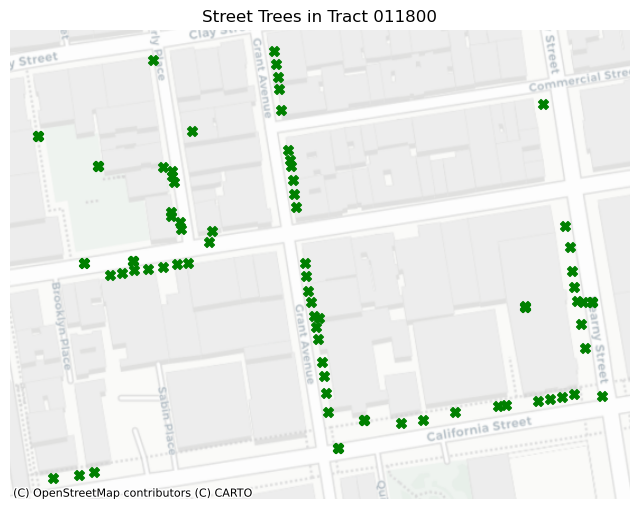

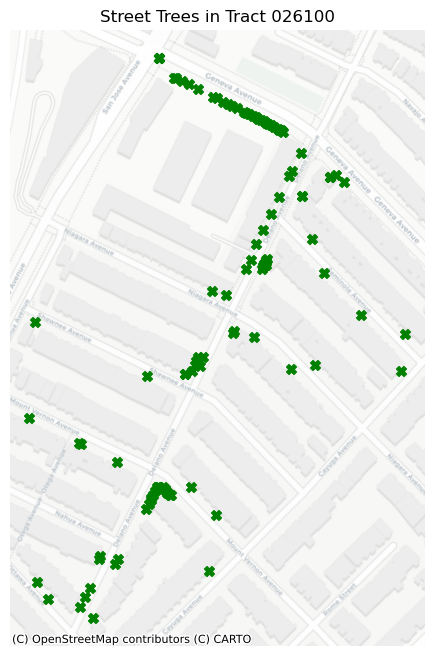

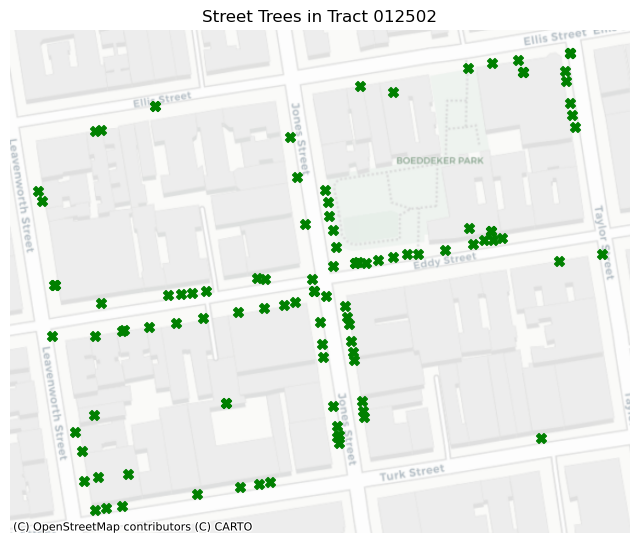

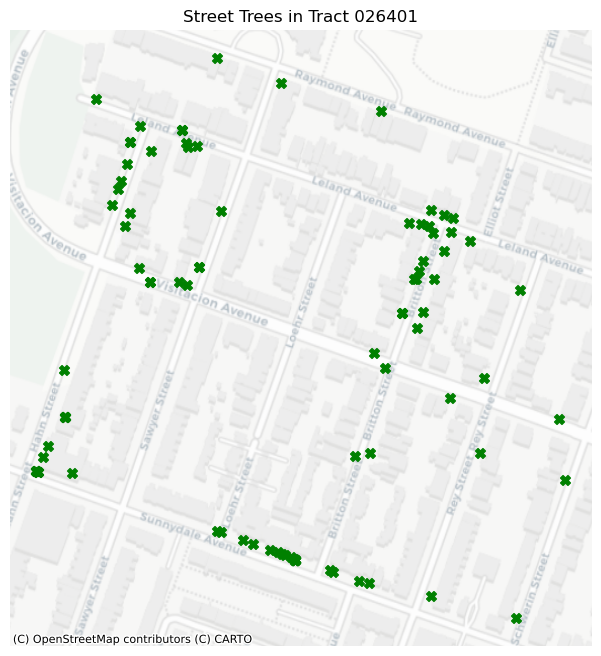

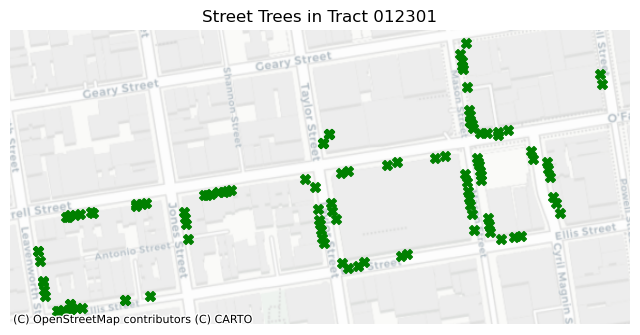

In [55]:
for tract in tracts: # "city" is the name of the column

    # map it
    fig, ax = plt.subplots(figsize=(8,8))

    # map options: notice the query to filter by individual city
    trees_mapped[trees_mapped.tract == tract].plot(ax=ax, 
                          marker='X',
                          markersize=50,
                          color='green')
    
    # no axes
    ax.axis('off')

    # title
    ax.set_title('Street Trees in Tract '+str(tract))

    #basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)